<a href="https://colab.research.google.com/github/amelzarrai/MLOPS_Projet/blob/master/proget_fed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_csv('IMDB Dataset.csv', engine='python', error_bad_lines=False)
df.head()

<ipython-input-18-e5565b88981a>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('IMDB Dataset.csv', engine='python', error_bad_lines=False)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import re
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,classification_report as cr
from sklearn.model_selection import train_test_split # function for splitting data to train and test
from nltk.classify import SklearnClassifier
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [ ]:
df['review'].loc[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0
0


In [ ]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

<ipython-input-31-3fc628a23c97>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment',data = df, palette=["#FFB6C1", "#D8BFD8"])


<Axes: xlabel='sentiment', ylabel='count'>

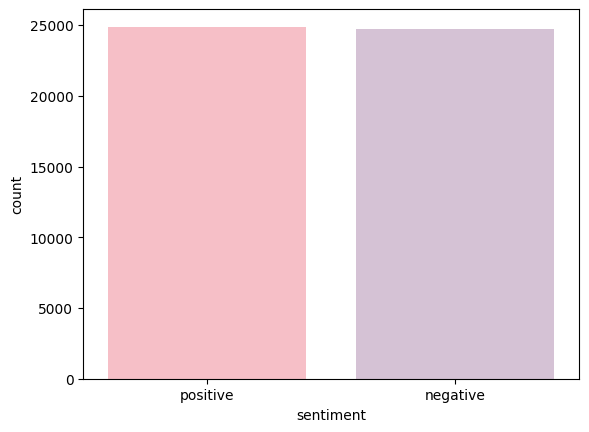

In [ ]:
sns.countplot(x='sentiment',data = df, palette=["#FFB6C1", "#D8BFD8"])

Le countplot reflète une distribution équilibrée entre les deux classes (positive, negative). La répartition des classes est un aspect important à considérer dans l'analyse de données. Elle peut avoir un impact sur la performance du modèle et le choix des métriques d'évaluation. ==> Les deux classes ont presque le même nombre d'observations, ce qui reflète une distribution équilibrée entre les deux classes.

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# Créer une série avec les fréquences des mots à partir de la colonne 'review'
all_words = df['review'].str.split(expand=True).unstack().value_counts()
# expand=True :argument ensures that the split words are placed in separate columns
all_words

data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(title='Top 50 (uncleaned) Word frequencies in the training dataset')

fig = go.Figure(data=data, layout=layout)

# Display the plot offline
py.iplot(fig, filename='basic-bar')

In [ ]:
from collections import Counter

# Filter the DataFrame to get only negative reviews
negative_reviews = df[df['sentiment'] == 'negative']
negative_sentences = negative_reviews['review']

# Tokenize negative reviews
negative_words = [word for review in negative_sentences for word in review.split()]

# Count word frequencies in negative reviews
negative_word_counts = Counter(negative_words)

# Get the top 25 words for negative sentiment
top_negative_words = negative_word_counts.most_common(25)

# Filter the DataFrame to get only positive reviews
positive_reviews = df[df['sentiment'] == 'positive']
positive_sentences = positive_reviews['review']

# Tokenize positive reviews
positive_words = [word for review in positive_sentences for word in review.split()]

# Count word frequencies in positive reviews
positive_word_counts = Counter(positive_words)
# print(positive_word_counts)

# Get the top 25 words for positive sentiment
top_positive_words = positive_word_counts.most_common(25)
print(top_positive_words)
print(top_negative_words)

[('the', 290932), ('and', 165372), ('a', 155251), ('of', 148673), ('to', 127921), ('is', 107829), ('in', 90145), ('that', 62191), ('I', 61914), ('it', 53162), ('this', 51403), ('/><br', 48800), ('as', 46419), ('with', 43153), ('was', 41934), ('for', 40944), ('The', 32756), ('but', 32227), ('his', 31622), ('on', 30498), ('film', 28768), ('are', 28273), ('movie', 26246), ('you', 24817), ('not', 24730)]
[('the', 273542), ('a', 149568), ('and', 134388), ('of', 132924), ('to', 131974), ('is', 93846), ('in', 78593), ('I', 69449), ('that', 63687), ('this', 61414), ('it', 53956), ('/><br', 51411), ('was', 49969), ('for', 39373), ('with', 38797), ('as', 36102), ('movie', 34042), ('The', 33958), ('but', 33569), ('on', 30228), ('have', 29678), ('are', 27827), ('be', 27043), ('not', 26997), ('you', 25417)]


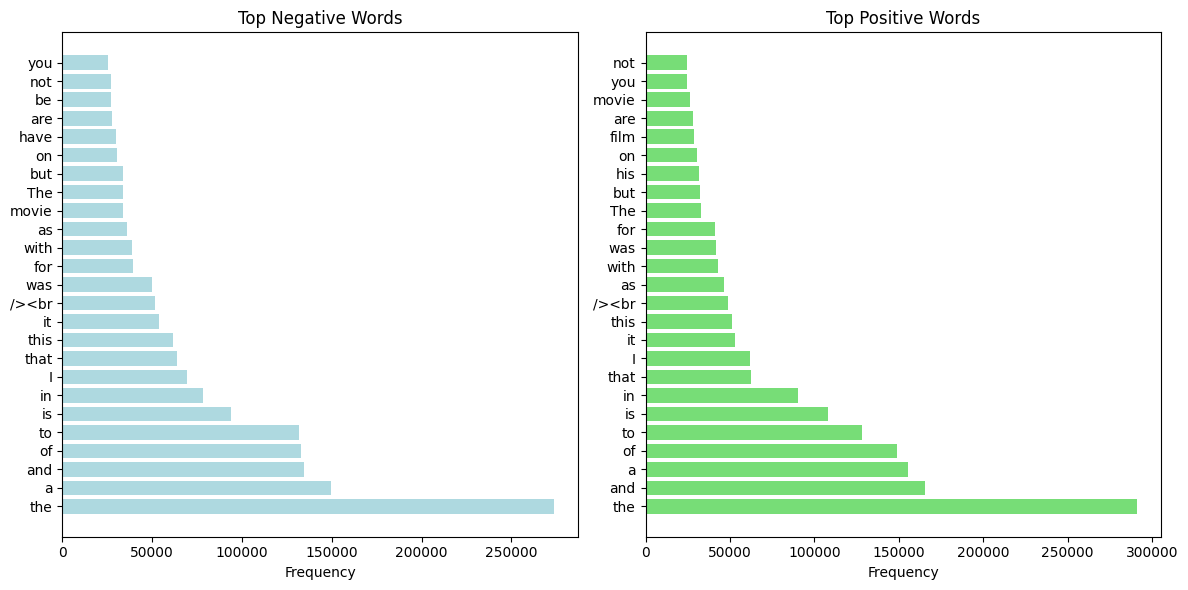

In [ ]:
# # Extract the top words and their counts
top_negative_words, negative_counts = zip(*top_negative_words)
top_positive_words, positive_counts = zip(*top_positive_words)
# print(type(negative_counts))
# print(top_negative_words)

pastel_blue = '#AED9E0'
pastel_green = '#77DD77'

# Create subplots for positive and negative word frequencies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_negative_words, negative_counts, color = pastel_blue)
plt.xlabel('Frequency')
plt.title('Top Negative Words')

plt.subplot(1, 2, 2)
plt.barh(top_positive_words, positive_counts, color = pastel_green)
plt.xlabel('Frequency')
plt.title('Top Positive Words')

plt.tight_layout()
plt.show()

Data Cleaning and Preprocessing
Implementing Stemming and removing stop words in the reviews

Convert all the text to lowercase
Removing Special Characters, html, http
Removing Stopwords
Text stemming : Expanding Contractions
Lemmatization</font>
STOPWORDS
Nous essayons de déterminer si un avis est positif ou négatif en nous basant sur les mots et les phrases utilisés. Les "Stopwords" comme "would," "shall," "could," et "might" sont souvent supprimés parce qu'ils ne donnent pas beaucoup d'indications sur le sentiment de l'avis. Toutefois, nous pourrions souhaiter conserver le mot "not" dans notre analyse, car il peut modifier de manière significative le sentiment d'une phrase.Par exemple, "We liked the movie" est positive, mais "We did not like the movie" est négatif en raison du mot "NOT".

In [ ]:
# Downloading Stop Words
# nltk.download('stopwords')

#Setting English stopwords
stopword_list = stopwords.words('english')

# Define a list of new stopwords to add to the default list
new_stopwords = ["would", "shall", "could", "might"]

# Extend the default stopwords list with the new stopwords
stopword_list.extend(new_stopwords)

# Remove the word "not" from the stopwords list (optional, depending on your analysis needs)
stopword_list.remove("not")
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Removing the html strips

def remove_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

df['review'] = df['review'].apply(lambda x: remove_html(x))
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
#Removing the http strips
def remove_http(text):
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return re.sub(pattern, '', text)
df['review'] = df['review'].apply(lambda x: remove_http(x))

In [ ]:
# Defining dictionary containing all emojis with their meanings :

emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused','<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [ ]:
# Replace all emojis(ds le tweet par la valeur correspondante dans le dictionnaire)
for review in df['review']:
    for emoji in emojis.keys():
            review = review.replace(emoji, emojis[emoji])

Implementation of Stemming
Stemming - Stemming is a process of reducing words to its root form even if the root has no dictionary meaning. For eg: beautiful and beautifully will be stemmed to beauti which has no meaning in English dictionary.

In [ ]:
#réinitialise l'index
df = df.reset_index(drop=True)

# importez la classe PorterStemmer
ps = PorterStemmer()

corpus = []
for i in range(0,len(df)):
    # Supprimer tous les caractères qui ne sont pas des lettres de l'alphabet
    review = re.sub('[^a-zA-Z]',' ', df['review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopword_list]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[0]

'one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust not show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci not high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

The occurrences of each unique word in corpus¶

In [ ]:
# Counts the occurrences of each unique word in the Series and returns a new Series with the word frequencies
freq_w = pd.Series(' '.join(corpus).split()).value_counts()
# converts the list of words into a pandas Series
# joins all the text documents in the corpus list into a single string, separating them with spaces

freq_w

movi        102460
film         95192
not          60286
one          55022
like         44823
             ...  
mastodon         1
quartz           1
hugwagon         1
tweaker          1
clatter          1
Length: 70877, dtype: int64

visualize the word frequencies

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
# plotly.graph_objs est un module de la bibliothèque Plotly en Python qui vous permet de créer
# et de personnaliser des graphiques interactifs. Plotly est une bibliothèque de visualisation
# de données populaire qui offre de nombreuses fonctionnalités pour créer des graphiques interactifs
# pour l'analyse de données et la présentation visuelle.

# Utilisez pandas pour créer une Series à partir de la liste de mots
corpus_series = pd.Series(corpus)

all_words = corpus_series.str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (cleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

WORDCLOUD

In [48]:
import warnings
warnings.filterwarnings("ignore")

WORDCLOUD FOR POSITIVE REVIEWS

In [49]:
df_reviews = pd.DataFrame(corpus, columns=['review'])
df_reviews['sentiment'] = df['sentiment']
# df_reviews.head()

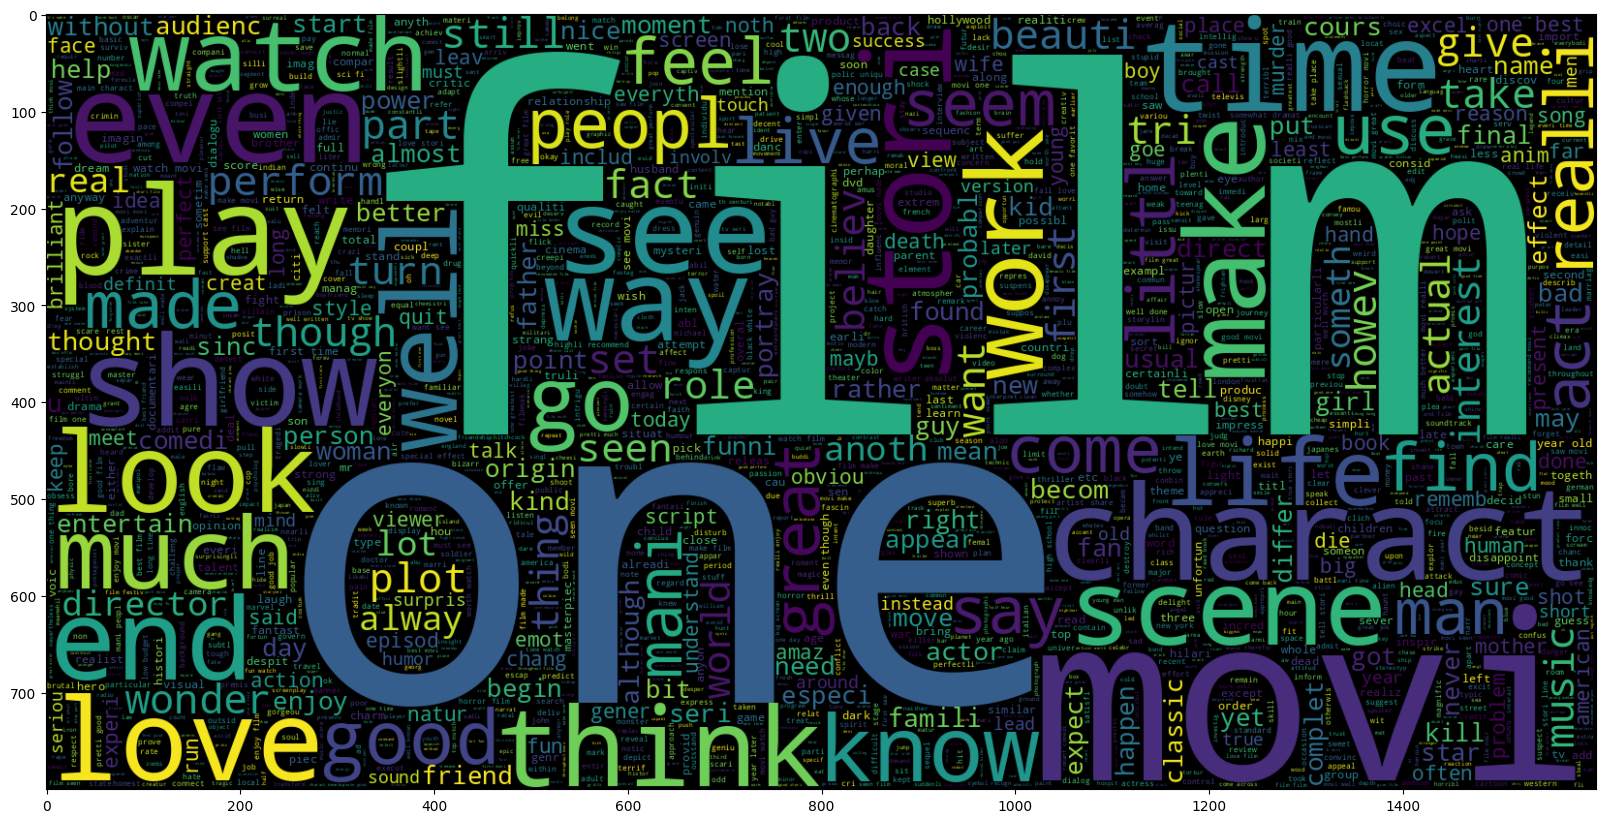

In [50]:
positive_reviews = df_reviews[df_reviews['sentiment']=='positive']
# positive_review.head()
text_l = positive_reviews['review'].tolist()

plt.figure(figsize = (20,20))
wc = WordCloud( max_words = 2000 , width = 1600 ,
               height = 800).generate(" ".join(text_l))
plt.imshow(wc , interpolation = 'bilinear')

WORDCLOUD FOR NEGATIVE REVIEWS

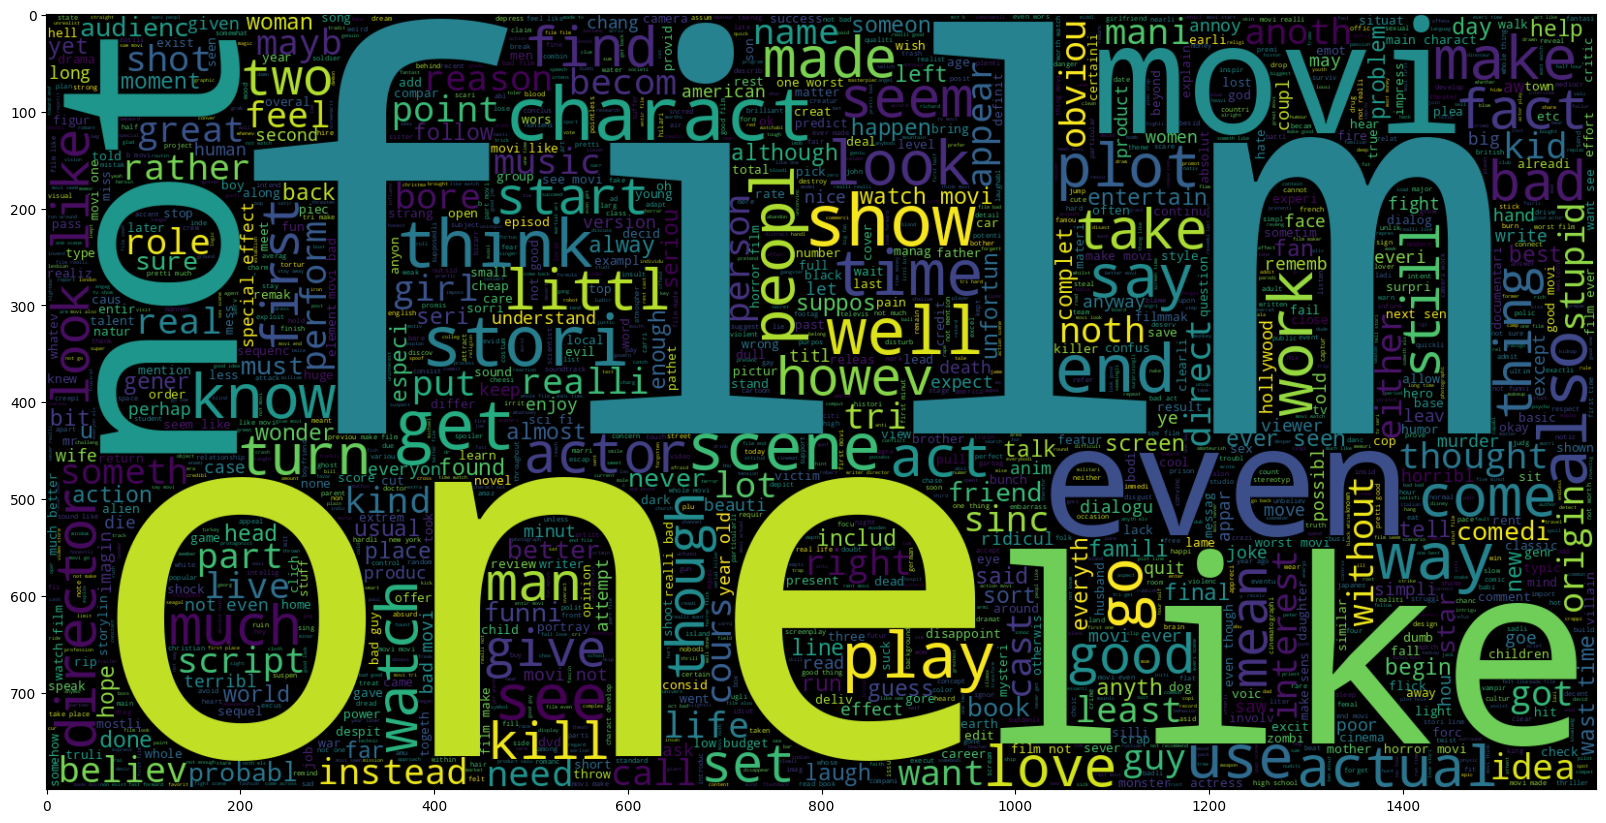

In [51]:
negative_reviews = df_reviews[df_reviews['sentiment']=='negative']
# positive_review.head()
text_l = negative_reviews['review'].tolist()

plt.figure(figsize = (20,20))
wc = WordCloud(stopwords=stopword_list,max_words = 2000 , width = 1600 ,
               height = 800).generate(" ".join(text_l))
plt.imshow(wc , interpolation = 'bilinear')

# VECTORIZATION: Features Extraction # Applying BagOfWords (BOW) Method
CountVectorizer is a feature extraction technique provided by scikit-learn. It's used for converting a collection of text documents into a matrix of token (word or n-gram) counts. This matrix can then be used as input for machine learning models.

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:max_df = 0.50 means "ignore terms that appear in more than 50% of the documents". max_df = 25 means "ignore terms that appear in more than 25 documents". The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

min_df is used for removing terms that appear too infrequently. For example: min_df = 0.01 means "ignore terms that appear in less than 1% of the documents". min_df = 5 means "ignore terms that appear in less than 5 documents".The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

In [52]:
# Creating a bag of words model
cv = CountVectorizer(ngram_range=(1, 2), max_df=0.85, min_df=2,
                      max_features=2500 )
x = cv.fit_transform(corpus).toarray()

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
vocab = cv.get_feature_names_out()

In [65]:
# Access the features (words or n-grams)
vocab = cv.get_feature_names_out()
#number of tokens
print(len(vocab))
print(vocab[:20])

2500
['abandon' 'abil' 'abl' 'absolut' 'absurd' 'abus' 'academi' 'accent'
 'accept' 'accid' 'accident' 'accompani' 'accomplish' 'accord' 'account'
 'accur' 'accus' 'achiev' 'across' 'act']


In [66]:
# Fit and transform the corpus to create a document-term matrix
doc_matrix= cv.transform(corpus)
doc_matrix= doc_matrix.todense()
doc_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [67]:
df_matrix = pd.DataFrame(doc_matrix, columns= vocab)
df_matrix.head(3)

,abandon,abil,abl,absolut,absurd,abus,academi,accent,accept,accid,...,yet,yet anoth,york,young,young man,young woman,younger,youth,zero,zombi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [68]:
#frequency of the terms calculer la somme des fréquences de chaque terme dans l'ensemble de données
# Cela donne la fréquence totale de chaque terme.
freq_mots = np.sum(doc_matrix, axis=0)
print(freq_mots)
#type of the matrix
print(type(doc_matrix))
#size of the matrix
print(doc_matrix.shape)

[[ 549 1138 2606 ...  671  660 2075]]
<class 'numpy.matrix'>
(49582, 2500)


Partition of data in train and test

In [69]:
# Appliquer one-hot encoded sur la colonne sentiment
y = pd.get_dummies(df['sentiment'])
print(y.head())
y = y.iloc[:,1].values

   negative  positive
0         0         1
1         0         1
2         0         1
3         1         0
4         0         1


In [70]:
# Train test split: split your data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

Model Selection and Evaluation
Naive Bayes for BOW

In [71]:
#Creates an instance of the Multinomial Naive Bayes classifier,trains the model on training data
text_analysis_model = MultinomialNB().fit(X_train,y_train)

In [72]:
# Prediction on new test data
y_pred = text_analysis_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [73]:
# EVALUATION
# calculates the accuracy of the model by comparing the true labels (y_test) with the predicted labels (y_pred).
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# generates report of different classification metrics: precision, recall, and F1-score, for each class
print(cr(y_test,y_pred))

Accuracy: 0.8387383026782833
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      6152
           1       0.83      0.85      0.84      6244

    accuracy                           0.84     12396
   macro avg       0.84      0.84      0.84     12396
weighted avg       0.84      0.84      0.84     12396



Random Forest Classifier for BOW

In [75]:
#Creates an instance of the Random Forest classifier, train the model on training data

classifer = RandomForestClassifier().fit(X_train,y_train)

In [76]:
# Prediction on new test data

y_pred2 = classifer.predict(X_test)

In [77]:
# calculates the accuracy of the model by comparing the true labels (y_test) with the predicted labels (y_pred).

score = accuracy_score(y_test,y_pred2)
print(f"Accuracy: {score}")

# generates report of different classification metrics: precision, recall, and F1-score, for each class
print(cr(y_test,y_pred2))

Accuracy: 0.8384156179412714
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      6152
           1       0.84      0.84      0.84      6244

    accuracy                           0.84     12396
   macro avg       0.84      0.84      0.84     12396
weighted avg       0.84      0.84      0.84     12396



Implementation of Lemmatization
Lemmatisation - Lemmatisation is a process of reducing words into their lemma or dictionary. It takes into account the meaning of the word in the sentence. For eg: beautiful and beautifully are lemmatised to beautiful and beautifully respectively without changing the meaning of the words. But, good, better and best are lemmatised to good since all the words have similar meaning.

In [80]:
# Creating a WordNet Lemmatizer object
lemmatizer = WordNetLemmatizer()

# Creating an empty list to store the preprocessed text
corpus = []
for i in range(0, len(df)):
    # Removing non-alphabetic characters and replacing them with spaces
    review = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopword_list]
    review = ' '.join(review)
    corpus.append(review)

In [79]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [81]:
corpus[0]

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust not show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy not high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence not violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watchin

Applying BagOfWords (BOW) Method

In [82]:
# Creating Bag of Words model
cv = CountVectorizer(ngram_range=(1, 2), max_df=0.85, min_df=2,
                      max_features=2500)
x = cv.fit_transform(corpus).toarray()

Partition of data in train and test

In [83]:
y = pd.get_dummies(df['sentiment'])
y = y.iloc[:,1].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

Model Selection and Evaluation
Naive Bayes for BOW

In [85]:
#Creates an instance of the Multinomial Naive Bayes classifier , train the model on training data

text_analysis_model = MultinomialNB().fit(X_train,y_train)

In [86]:
# Prediction on new test data
y_pred = text_analysis_model.predict(X_test)

In [87]:
# calculates the accuracy of the model by comparing the true labels (y_test) with the predicted labels (y_pred).
score = accuracy_score(y_test,y_pred)
print(f"Accuracy: {score}")

# # generates report of different classification metrics: precision, recall, and F1-score, for each class
print(cr(y_test,y_pred))

Accuracy: 0.8412391093901258
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6152
           1       0.83      0.85      0.84      6244

    accuracy                           0.84     12396
   macro avg       0.84      0.84      0.84     12396
weighted avg       0.84      0.84      0.84     12396



Random Forest Classifier for BOW

In [88]:
#Creates an instance of the Random Forest classifier, train the model on training data

classifer = RandomForestClassifier().fit(X_train,y_train)

In [89]:
#  Prediction on new test data
y_pred2 = classifer.predict(X_test)

In [90]:
# Performance Evaluation of the classification model
# calculates the accuracy of the model by comparing the true labels (y_test) with the predicted labels (y_pred).
score = accuracy_score(y_test,y_pred2)
print(f"Accuracy: {score}")

# generates report of different classification metrics: precision, recall, and F1-score, for each class
print(cr(y_test,y_pred2))

Accuracy: 0.8381736043885124
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      6152
           1       0.84      0.84      0.84      6244

    accuracy                           0.84     12396
   macro avg       0.84      0.84      0.84     12396
weighted avg       0.84      0.84      0.84     12396



INTERPRETATION

L'accuracy représente la proportion totale de prédictions correctes parmi toutes les prédictions. Dans ce cas, le modèle a correctement classé les exemples environ 76,8% du temps.
Precision (Précision) : Pour la classe 0 : 0.75 Cela signifie que parmi toutes les instances prédites comme appartenant à la classe 0, 75% étaient correctes. La précision mesure la qualité des prédictions positives. Une valeur élevée indique que le modèle ne prédit pas la classe 0 à tort très souvent.
Pour la classe 1 : 0.79 Cela signifie que parmi toutes les instances prédites comme appartenant à la classe 1, 79% étaient correctes. Une précision élevée pour la classe 1 indique une bonne capacité du modèle à prédire correctement cette classe.
Recall (Rappel) : Pour la classe 0 : 0.83 Cela signifie que le modèle a capturé 83% de toutes les instances réelles de la classe 0. Le rappel mesure la capacité du modèle à capturer toutes les occurrences réelles de la classe 0.
Pour la classe 1 : 0.71 Cela signifie que le modèle a capturé 71% de toutes les instances réelles de la classe 1. Un rappel élevé pour la classe 0 indique une bonne capacité du modèle à capturer cette classe.
F1-Score : Pour la classe 0 : 0.79 L'F1-score est la moyenne harmonique de la précision et du rappel. Il donne une mesure équilibrée entre la précision et le rappel.
Pour la classe 1 : 0.75 Des valeurs élevées de F1-score indiquent un équilibre entre la précision et le rappel pour la classe respective.
Support :Pour la classe 0 : 385 / Pour la classe 1 : 365 Le support indique le nombre d'instances réelles de chaque classe dans l'ensemble de données.
Nous avons mis en œuvre l'analyse des sentiments des critiques de films en utilisant la technique NLP Bag of Words (BOW). Dans ce Notebook, nous avons utilisé des techniques de prétraitement de texte (stemming et lemmatisation) et nous avons appliqué la technique BOW (CountVectorizer) sur les données. Nous avons utilisé les algorithmes Naive_Bayes et RandomForestClassifer pour tester la précision des résultats.

Accuracy Naive Bayes (with Stemmer) ≈ 85.2 %
Accuracy RandomForestClassifier (with Stemmer)≈ 78 %

Accuracy Naive Bayes (with Lemmatizer) ≈ 84.5 %
Accuracy RandomForestClassifier (with Lemmatizer) 75 %



Applying Tf-Idf(Term Frequency-Inverse Document Frequency) Method
With Lemmatization

In [91]:
# Creating a TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500, ngram_range=(1, 2), max_df=0.85, min_df=2)

X = tv.fit_transform(corpus).toarray()

Partition of data in train and test

In [92]:
y = pd.get_dummies(df['sentiment'])
y = y.iloc[:,1].values

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Naive Bayes for TF-IDF

In [94]:
text_analysis_model2 = MultinomialNB().fit(X_train,y_train)

In [95]:
y_predtf = text_analysis_model2.predict(X_test)

In [96]:
score=accuracy_score(y_test,y_predtf)
print(f"Accuracy: {score}")

print(cr(y_test,y_predtf))

Accuracy: 0.8484420691741454
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4909
           1       0.84      0.87      0.85      5008

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



In [98]:
classifer_predict = classifer2.predict(X_test)

In [99]:
score=accuracy_score(y_test,classifer_predict)
print(f"Accuracy: {score}")

print(cr(y_test,classifer_predict))

Accuracy: 0.8387617222950489
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      4909
           1       0.84      0.84      0.84      5008

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



Random Forest Classifier for TF-IDF

In [97]:
classifer2 = RandomForestClassifier().fit(X_train,y_train)

In [100]:
classifer_predict = classifer2.predict(X_test)

In [101]:
score=accuracy_score(y_test,classifer_predict)
print(f"Accuracy: {score}")

print(cr(y_test,classifer_predict))

Accuracy: 0.8387617222950489
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      4909
           1       0.84      0.84      0.84      5008

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



CONFUSION MATRIX

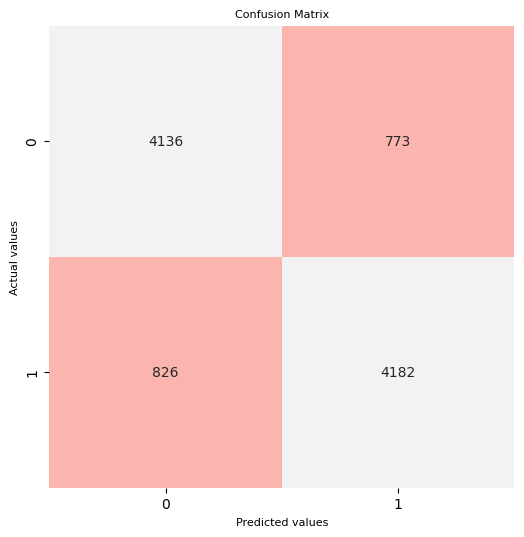

In [102]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, classifer_predict)

# Utilisez une palette de couleurs personnalisée avec du violet (purple)
custom_palette = sns.color_palette("Pastel1")

# Créez une figure et un axe pour le heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap=custom_palette, cbar=False)

# Ajoutez des étiquettes d'axe et de titre
plt.xlabel("Predicted values", fontdict={'size': 8})
plt.ylabel("Actual values", fontdict={'size': 8})
plt.title('Confusion Matrix', fontdict={'size': 8})

# Affichez le heatmap
plt.show()

La matrice de confusion (confusion matrix) est une table qui décrit les performances d'un modèle de classification. TN (True Negative) : le nombre d'échantillons correctement prédits comme appartenant à la classe 0 = 252 FP (False Positive) : le nombre d'échantillons incorrectement prédits comme appartenant à la classe 1 (alors qu'ils appartiennent réellement à la classe 0)= 54 FN (False Negative) : le nombre d'échantillons incorrectement prédits comme appartenant à la classe 0 (alors qu'ils appartiennent réellement à la classe 1) = 85 TP (True Positive) : le nombre d'échantillons correctement prédits comme appartenant à la classe 1 = 209

CONCLUSION

BOW METHOD :

Accuracy Naive Bayes (with Stemmer) ≈ 85.2 %
Accuracy RandomForestClassifier (with Stemmer) 76 %

Accuracy Naive Bayes (with Lemmatizer) ≈ 84.5 %
Accuracy RandomForestClassifier (with Lemmatizer) 75 %

TF-IDF METHOD :

Accuracy Naive Bayes (with Lemmatizer) 85.77%
Accuracy RandomForestClassifier (with Lemmatizer) 78

==> The best model : Naive Bayes (with Lemmatizer and TF-IDF ) ≈ 86 %

Le modèle Naive Bayes avec lemmatisation a obtenu les meilleurs résultats parmi tous les modèles et techniques de prétraitement, avec une précision ≈ 86 %. Le choix de la technique de prétraitement (lemmatisation ou stemming) et de la méthode d'extraction des caractéristiques (BOW ou TF-IDF) peut avoir un impact significatif sur les performances des modèles de classification de textes. Il est courant que les modèles Naive Bayes donnent de bons résultats dans les tâches de classification de textes, en particulier lorsqu'ils sont associés à des techniques de prétraitement appropriées telles que la lemmatisation.